# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from tensorflow.python.keras.utils.version_utils import training

print("Hello World!")
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


Hello World!


In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data/patato_deseases",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)


68

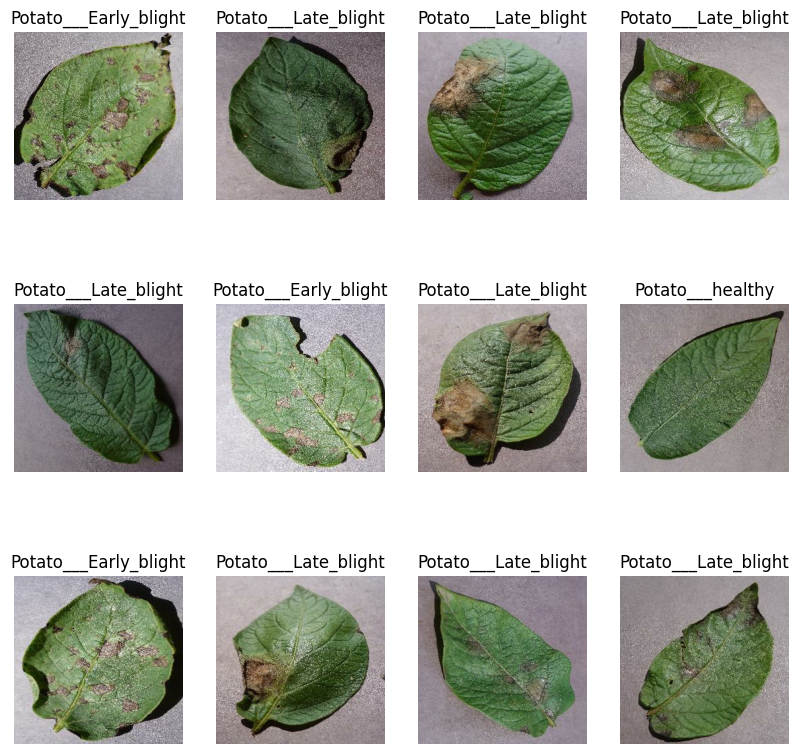

In [25]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [26]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test

In [28]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [29]:
train_ds = dataset.take(54)
len(train_ds)

54

In [30]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [31]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [32]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [33]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [34]:
def get_dataset_partition_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)



    return train_ds, val_ds, test_ds

In [35]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [36]:
len(train_ds)

54

In [37]:
len(test_ds)

8

In [38]:
len(val_ds)

6

In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
# Correction : on enlève '.experimental.preprocessing'
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), # ANCIEN : layers.experimental.preprocessing.Resizing
    layers.Rescaling(1.0/255)                  # ANCIEN : layers.experimental.preprocessing.Rescaling
])

In [43]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])